In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import IPython.display as ipd  # To play sound in the notebook
import os

In [2]:
#dataset
RAV = r"C:\Users\ratnd\Desktop\finalyr project\ravdess"
TESS = r"C:\Users\ratnd\Desktop\finalyr project\tess"
SAVEE = r"C:\Users\ratnd\Desktop\finalyr project\savee\AudioData"
rav = os.listdir(RAV)
tess = os.listdir(TESS)
sav = os.listdir(SAVEE)
print("Ravdess files: ",rav[:])
print()
print("Tess files: ",tess[:])
print()
print("Savee Files: ",sav[:])

Ravdess files:  ['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']

Tess files:  ['OAF_angry', 'OAF_disgust', 'OAF_Fear', 'OAF_happy', 'OAF_neutral', 'OAF_Pleasant_surprise', 'OAF_Sad', 'YAF_angry', 'YAF_disgust', 'YAF_fear', 'YAF_happy', 'YAF_neutral', 'YAF_pleasant_surprised', 'YAF_sad']

Savee Files:  ['DC', 'JE', 'JK', 'KL']


<i><br>SAVEE DATASET<br></i>
> Wandering in savee dataset

In [3]:
savee = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for file in savee:
    f = os.listdir(SAVEE+"\\"+file)
    for i in f:
        if i[0]=='a':
            emotion.append('male_angry')
        elif i[0]=='d':
            emotion.append('male_disgust')
        elif i[0]=='f':
            emotion.append('male_fear')
        elif i[0]=='h':
            emotion.append('male_happy')
        elif i[0]=='n':
            emotion.append('male_neutral')
        elif i[:2]=='sa':
            emotion.append('male_sad')
        elif i[:2]=='su':
            emotion.append('male_surprise')
        else:
            emotion.append('male_error') 
        path.append(SAVEE + "\\"+ file +"\\" + i)

# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_sad          60
male_angry        60
male_fear         60
male_surprise     60
male_happy        60
male_disgust      60
Name: labels, dtype: int64

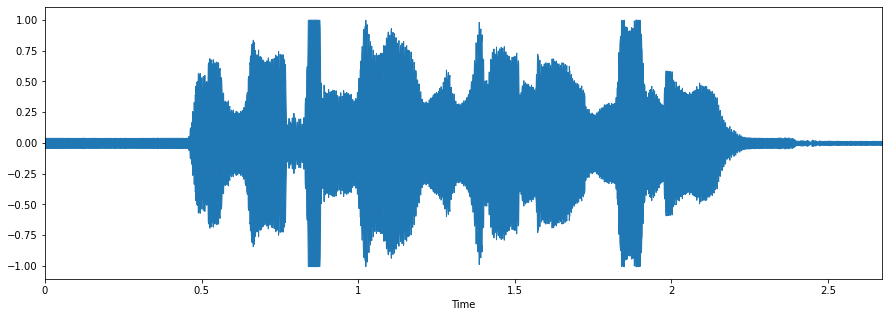

In [4]:
#Fear audio in savee dataset
fname = SAVEE + '\\DC\\f10.wav' 
data, rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=rate)

# Lets play the audio 
ipd.Audio(fname)

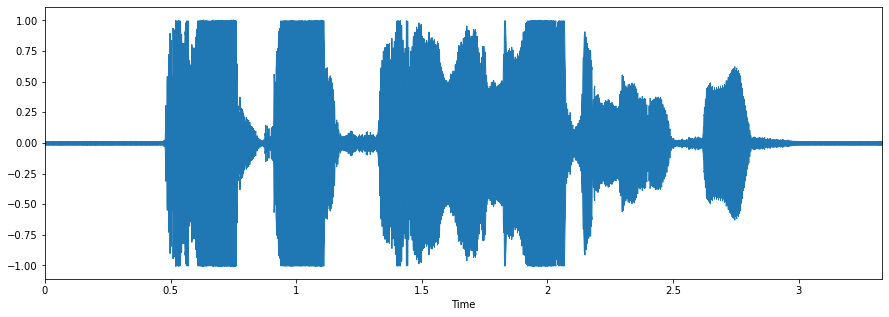

In [5]:
# happy track from savee dataset
fname = SAVEE + '\\DC\\h09.wav'  
data,rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=rate)

# Lets play the audio 
ipd.Audio(fname)

<i><br>RAVDESS DATASET</br></i>
> Wandering in ravdess dataset

In [6]:
rav = os.listdir(RAV)
rav.sort()

emotion = []
gender = []
path = []
for i in rav:
    fname = os.listdir(RAV +"\\"+ i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + "\\"+i + '\\' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
female_fear         96
female_disgust      96
male_surprise       96
male_angry          96
female_angry        96
male_fear           96
male_disgust        96
male_sad            96
female_surprise     96
female_happy        96
female_sad          96
male_happy          96
Name: labels, dtype: int64

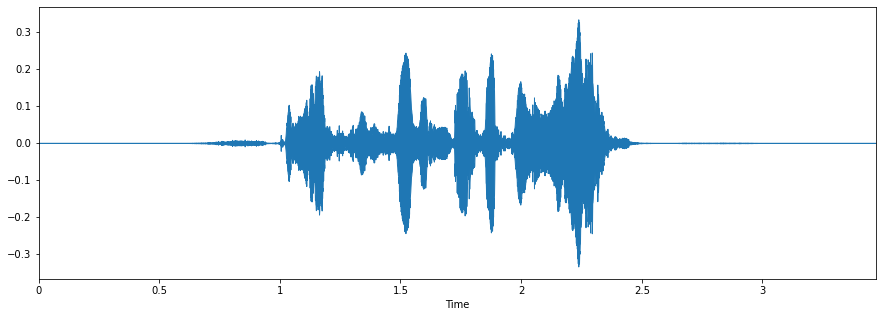

In [7]:
# fear audio from Ravdess dataset
fname = RAV + '\\Actor_14\\03-01-06-02-02-02-14.wav'  
data, rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=rate)

# Lets play the audio 
ipd.Audio(fname)

<i><br>TESS DATASET</br></i>
> Wandering in Tess dataset

In [8]:
tess = os.listdir(TESS)
tess

['OAF_angry',
 'OAF_disgust',
 'OAF_Fear',
 'OAF_happy',
 'OAF_neutral',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [9]:
path = []
emotion = []

for i in tess:
    fname = os.listdir(TESS +"\\"+ i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + "\\"+i + "\\" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_fear        400
female_neutral     400
female_angry       400
female_surprise    400
female_happy       400
female_disgust     400
female_sad         400
Name: labels, dtype: int64

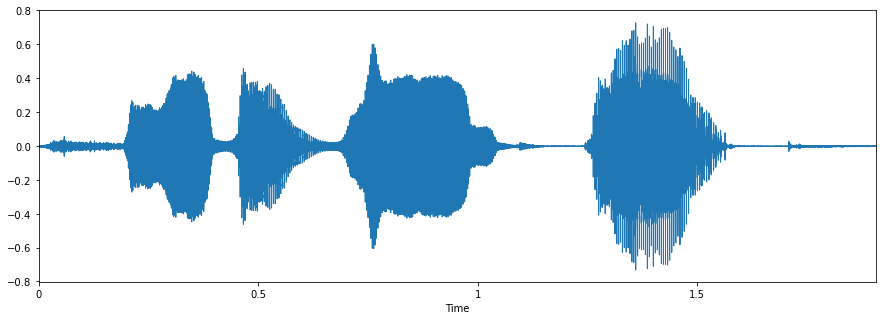

In [10]:
# a happy audio from tess dataset
fname =  TESS + '\\YAF_happy\\YAF_back_happy.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [11]:
df = pd.concat([SAVEE_df, RAV_df, TESS_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

female_neutral     544
female_fear        496
female_angry       496
female_surprise    496
female_happy       496
female_disgust     496
female_sad         496
male_neutral       264
male_surprise      156
male_angry         156
male_fear          156
male_disgust       156
male_sad           156
male_happy         156
Name: labels, dtype: int64


In [12]:
# feature extraction 
def extract_feature(path):
    
    X,_ = librosa.load(path)
    stft = librosa.amplitude_to_db(abs(librosa.stft(X)))
    mfcc = librosa.feature.mfcc(y=X, sr=rate, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=X, sr=13)
    
    return stft,mfcc,chroma

C:\Users\ratnd\anaconda3\envs\Final year\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


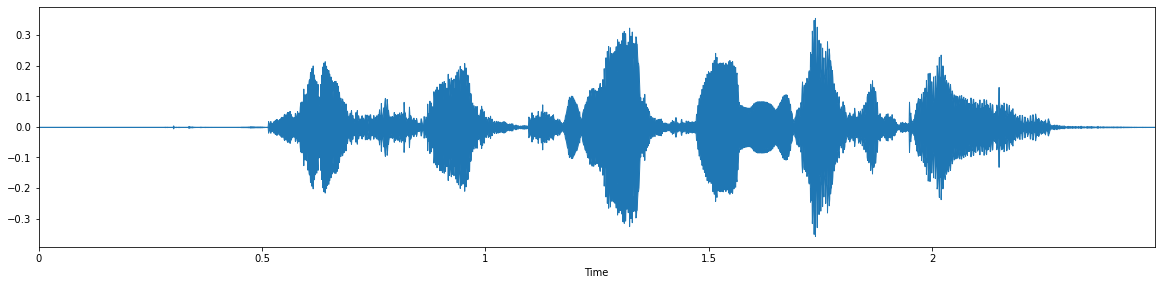

In [13]:
# RAVDESS Dataset, Gender -> Female, Emotion -> Angry 
path = RAV+"\\Actor_08\\03-01-05-02-01-01-08.wav"
X, rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
stft,mfcc,chroma = extract_feature(path)


# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=rate)
ipd.Audio(path)


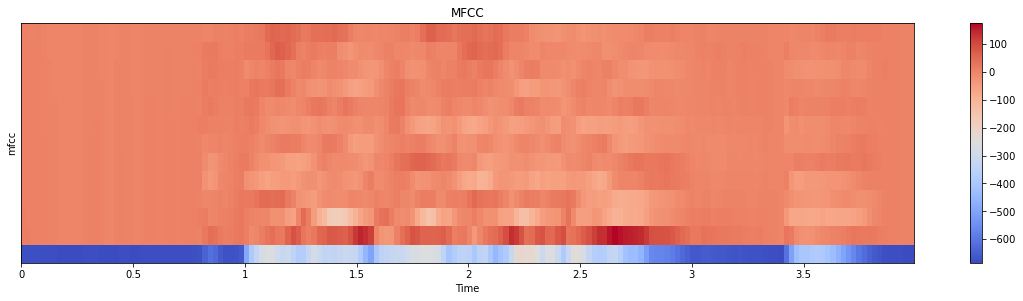

In [14]:
# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('mfcc')
plt.title("MFCC")
plt.colorbar()

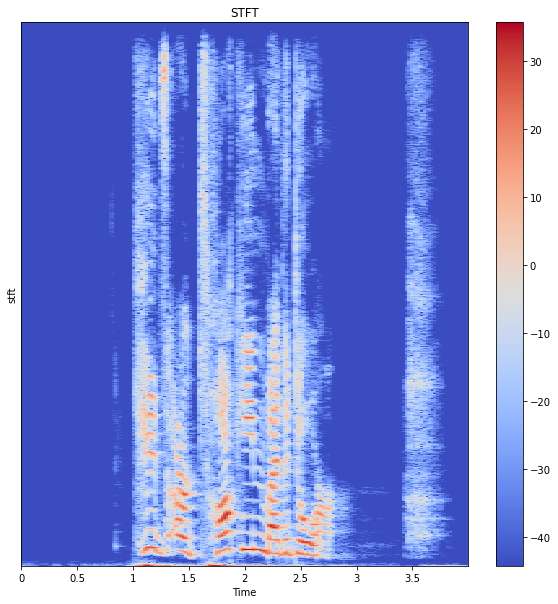

In [15]:
#stft
plt.figure(figsize=(10, 10))
librosa.display.specshow(stft, x_axis='time')
plt.ylabel('stft')
plt.title('STFT')
plt.colorbar()

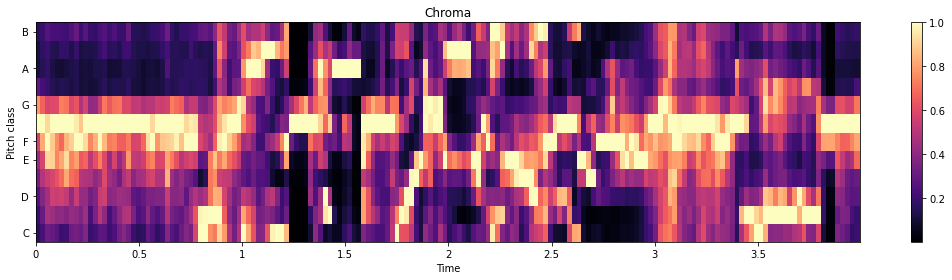

In [16]:
plt.figure(figsize=(15, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma')
plt.tight_layout()
plt.show()

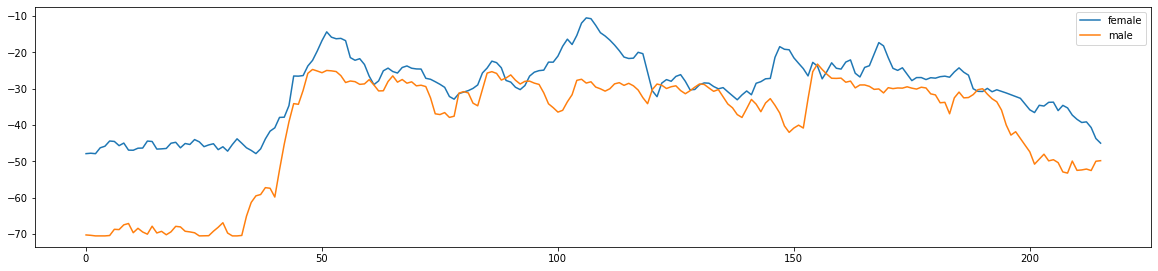

In [17]:
# RAVDESS Dataset, Gender -> Female, Emotion -> Angry 
path = RAV+"\\Actor_08\\03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
#print(len(female))

# Source - RAVDESS Dataset, Gender -> Male, Emotion -> Angry 
path = RAV+"\\Actor_09\\03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
#print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

In [18]:
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle

In [19]:
full_path = pd.read_csv(r"C:\Users\ratnd\Desktop\finalyr project\Data_path.csv")
full_path.head(10)

,labels,source,path
0,male_angry,SAVEE,C:\Users\ratnd\Desktop\finalyr project\savee\A...
1,male_angry,SAVEE,C:\Users\ratnd\Desktop\finalyr project\savee\A...
2,male_angry,SAVEE,C:\Users\ratnd\Desktop\finalyr project\savee\A...
3,male_angry,SAVEE,C:\Users\ratnd\Desktop\finalyr project\savee\A...
4,male_angry,SAVEE,C:\Users\ratnd\Desktop\finalyr project\savee\A...
5,male_angry,SAVEE,C:\Users\ratnd\Desktop\finalyr project\savee\A...
6,male_angry,SAVEE,C:\Users\ratnd\Desktop\finalyr project\savee\A...
7,male_angry,SAVEE,C:\Users\ratnd\Desktop\finalyr project\savee\A...
8,male_angry,SAVEE,C:\Users\ratnd\Desktop\finalyr project\savee\A...
9,male_angry,SAVEE,C:\Users\ratnd\Desktop\finalyr project\savee\A...


In [20]:
def choosen_feature_extractor(fe):
    df = pd.DataFrame(columns=['feature'])

    # loop feature extraction over the entire dataset
    counter=0
    for index,path in enumerate(full_path.path):
        
        X, rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=44100,offset=0.5)
        rate = np.array(rate)
        if fe=='mfcc':
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=rate, n_mfcc=13),axis=0)  # mean as the feature
            df.loc[counter] = [mfccs]
            counter+=1  
        
        elif fe=='stft':
            stft = np.mean(librosa.amplitude_to_db(abs(librosa.stft(X))),axis=0)  # mean as the feature
            df.loc[counter]=[stft]
            counter+=1
    
        elif fe=='chroma':
            chroma = np.mean(librosa.feature.chroma_stft(y=X, sr=13),axis=0)  # mean as the feature
            df.loc[counter]=[chroma]
            counter+=1
            
    # Check a few records to make sure its processed successfully
    print(len(df))
    return df

In [21]:
fe = input('Enter the feature extractor: ')
df = choosen_feature_extractor(fe)
df.head()

Enter the feature extractor: mfcc
4720


,feature
0,"[-11.113933, -7.215756, -6.21919, -5.9265423, ..."
1,"[-24.44983, -22.465742, -22.928043, -23.243807..."
2,"[-25.000114, -24.520256, -24.178183, -23.84745..."
3,"[-1.529839, -4.333437, -12.285237, -13.083024,..."
4,"[-22.458635, -22.467834, -25.884357, -27.82704..."


In [22]:
df = pd.concat([full_path,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

,labels,source,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,male_angry,SAVEE,C:\Users\ratnd\Desktop\finalyr project\savee\A...,-11.113933,-7.215756,-6.219190,-5.926542,-5.850419,-4.808960,-2.513003,...,-4.088852,-5.023864,-5.254714,-5.234095,-5.310307,-5.621665,-6.072197,-6.611348,-2.509089,1.964608
1,male_angry,SAVEE,C:\Users\ratnd\Desktop\finalyr project\savee\A...,-24.449829,-22.465742,-22.928043,-23.243807,-22.926605,-23.432241,-14.830004,...,-22.627258,-22.633406,-22.511597,-24.300154,-24.496809,-22.895985,-23.511503,-24.342152,-24.530262,-25.457796
2,male_angry,SAVEE,C:\Users\ratnd\Desktop\finalyr project\savee\A...,-25.000114,-24.520256,-24.178183,-23.847450,-15.182783,-10.732485,-8.681472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,male_angry,SAVEE,C:\Users\ratnd\Desktop\finalyr project\savee\A...,-1.529839,-4.333437,-12.285237,-13.083024,-12.041327,-11.819768,-9.414148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,male_angry,SAVEE,C:\Users\ratnd\Desktop\finalyr project\savee\A...,-22.458635,-22.467834,-25.884357,-27.827044,-27.593534,-26.666508,-18.659023,...,-25.291666,-25.854906,-26.821354,-25.436455,-24.179941,-23.281618,-24.167494,-25.228062,-25.902941,-25.589964


In [23]:
df=df.fillna(0)
print(df.shape)
df[:]

(4720, 219)


,labels,source,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,male_angry,SAVEE,C:\Users\ratnd\Desktop\finalyr project\savee\A...,-11.113933,-7.215756,-6.219190,-5.926542,-5.850419,-4.808960,-2.513003,...,-4.088852,-5.023864,-5.254714,-5.234095,-5.310307,-5.621665,-6.072197,-6.611348,-2.509089,1.964608
1,male_angry,SAVEE,C:\Users\ratnd\Desktop\finalyr project\savee\A...,-24.449829,-22.465742,-22.928043,-23.243807,-22.926605,-23.432241,-14.830004,...,-22.627258,-22.633406,-22.511597,-24.300154,-24.496809,-22.895985,-23.511503,-24.342152,-24.530262,-25.457796
2,male_angry,SAVEE,C:\Users\ratnd\Desktop\finalyr project\savee\A...,-25.000114,-24.520256,-24.178183,-23.847450,-15.182783,-10.732485,-8.681472,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male_angry,SAVEE,C:\Users\ratnd\Desktop\finalyr project\savee\A...,-1.529839,-4.333437,-12.285237,-13.083024,-12.041327,-11.819768,-9.414148,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,male_angry,SAVEE,C:\Users\ratnd\Desktop\finalyr project\savee\A...,-22.458635,-22.467834,-25.884357,-27.827044,-27.593534,-26.666508,-18.659023,...,-25.291666,-25.854906,-26.821354,-25.436455,-24.179941,-23.281618,-24.167494,-25.228062,-25.902941,-25.589964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4715,female_sad,TESS,C:\Users\ratnd\Desktop\finalyr project\tess\YA...,-11.968084,-15.406763,-27.167522,-27.885582,-28.895691,-29.227583,-27.117409,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4716,female_sad,TESS,C:\Users\ratnd\Desktop\finalyr project\tess\YA...,-10.008486,-14.674897,-25.038309,-24.692644,-26.183043,-25.815727,-25.819170,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4717,female_sad,TESS,C:\Users\ratnd\Desktop\finalyr project\tess\YA...,-8.330003,-12.370699,-26.039032,-24.702271,-23.397326,-22.917080,-23.107155,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4718,female_sad,TESS,C:\Users\ratnd\Desktop\finalyr project\tess\YA...,-16.001234,-19.055729,-28.437143,-27.302050,-28.091366,-27.433748,-27.071127,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[100:110]


,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
2236,-14.069543,-17.486082,-29.169952,-28.110670,-25.980324,-24.775928,-26.322140,-27.262394,-28.071276,-29.211836,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4424,-23.015339,-26.259884,-33.663052,-36.447636,-33.605213,-31.012774,-30.186913,-33.208118,-34.477726,-33.042973,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3911,-13.212933,-17.699461,-31.437263,-30.001631,-30.898672,-32.928417,-32.093174,-32.216869,-30.784115,-30.274828,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2820,-16.421780,-18.440372,-29.717499,-30.526773,-30.457460,-30.782339,-30.194284,-30.394115,-29.976206,-28.610630,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
263,-9.818368,-5.538361,-4.103409,-3.238886,-2.764816,-1.719262,-1.335670,-1.798186,-6.284044,-13.789565,...,-22.057453,-21.265871,-22.477053,-22.668722,-22.260008,-18.756430,-12.893023,-10.652368,-6.404513,-3.346906
1869,-67.187866,-67.187866,-67.187866,-67.187866,-67.187866,-67.187866,-67.187866,-67.187866,-67.187866,-67.187866,...,-41.512470,-43.044590,-42.985920,-42.288406,-42.148209,-43.489597,-43.602985,-41.101864,-35.846859,-30.827677
1186,-64.366310,-64.366310,-64.366310,-64.366310,-64.366310,-64.366310,-64.366310,-64.366310,-64.366310,-64.366310,...,-49.949028,-50.635201,-53.602913,-52.990242,-52.317410,-52.710506,-51.396217,-49.627842,-47.911674,-46.454464
56,0.607762,-1.679550,-5.992861,-8.232149,-6.995866,-6.320786,-5.709888,-5.196733,-4.764081,-6.203738,...,-7.169598,-7.128225,-7.639313,-9.027306,-9.877607,-8.210990,-7.120928,-6.733892,-4.318378,1.207901
695,-49.626648,-49.626648,-49.626648,-49.626648,-49.626648,-49.626648,-49.626648,-49.626648,-49.626648,-49.626648,...,-41.049374,-41.813663,-44.129826,-46.296909,-47.937187,-48.107651,-47.130939,-49.147984,-49.498745,-48.562721
2088,-14.559509,-18.058800,-28.636343,-28.846666,-28.715263,-30.395649,-31.130941,-30.420013,-29.712862,-29.898569,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now 
X_train[150:160]


,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
4586,0.302500,0.373610,0.800346,0.738698,0.757752,1.025935,1.058791,1.041157,1.020627,0.985855,...,0.710039,0.709549,0.709840,0.709828,0.709606,0.709419,0.709105,0.709358,0.697955,0.684089
1022,-1.097511,-0.943543,-0.783258,-0.936616,-0.893758,-0.865381,-0.944136,-0.994181,-0.994147,-0.985271,...,-1.164629,-1.206036,-1.214249,-1.229780,-1.239216,-1.224753,-1.242851,-1.393809,-1.536039,-1.512683
3733,0.886441,0.849112,0.895038,1.018500,1.305812,1.533182,1.821016,1.974561,1.865634,1.705877,...,0.710039,0.709549,0.709840,0.709828,0.709606,0.709419,0.709105,0.709358,0.697955,0.684089
4612,0.857634,0.807651,0.525908,0.493220,0.505764,0.539355,0.638465,0.585962,0.404145,0.380644,...,0.710039,0.709549,0.709840,0.709828,0.709606,0.709419,0.709105,0.709358,0.697955,0.684089
2677,0.749651,0.678853,0.718372,0.857437,0.775359,0.772085,0.696186,0.716394,0.761223,0.769844,...,0.710039,0.709549,0.709840,0.709828,0.709606,0.709419,0.709105,0.709358,0.697955,0.684089
2830,0.541105,0.589192,0.647587,0.562742,0.576047,0.561952,0.560738,0.508212,0.510476,0.351543,...,0.710039,0.709549,0.709840,0.709828,0.709606,0.709419,0.709105,0.709358,0.697955,0.684089
1662,-0.638312,-0.594738,-0.348336,-0.353008,-0.358494,-0.365991,-0.373013,-0.375870,-0.379684,-0.382507,...,-1.125053,-1.137989,-1.135354,-1.135439,-1.133828,-1.127834,-1.116953,-1.108063,-1.122203,-1.123814
665,-2.024472,-2.090701,-2.206798,-2.192096,-2.181627,-2.183002,-2.181049,-2.170587,-2.114757,-2.063927,...,-1.636587,-1.598461,-1.617286,-1.634495,-1.578474,-1.735968,-1.725966,-1.696343,-1.791173,-1.682603
3528,0.441343,0.407458,0.632849,0.443760,0.385811,0.339185,0.318500,0.179747,0.174369,0.109568,...,0.710039,0.709549,0.709840,0.709828,0.709606,0.709419,0.709105,0.709358,0.697955,0.684089
4252,0.479949,0.553036,0.703263,0.707053,0.756161,0.768880,0.651303,0.647302,0.616481,0.667678,...,0.710039,0.709549,0.709840,0.709828,0.709606,0.709419,0.709105,0.709358,0.697955,0.684089


In [26]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(3540, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [27]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(3540, 216, 1)

In [28]:
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 216, 256)          2304      
_________________________________________________________________
activation (Activation)      (None, 216, 256)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization (BatchNo (None, 216, 256)          1024      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
dropout (Dropout)            (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 27, 256)           0

In [29]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
111/111 [==============================] - 40s 339ms/step - loss: 2.7493 - accuracy: 0.0660 - val_loss: 2.6393 - val_accuracy: 0.0322
Epoch 2/100
111/111 [==============================] - 37s 335ms/step - loss: 2.4606 - accuracy: 0.2331 - val_loss: 2.6225 - val_accuracy: 0.0983
Epoch 3/100
111/111 [==============================] - 33s 298ms/step - loss: 2.2979 - accuracy: 0.2834 - val_loss: 2.5824 - val_accuracy: 0.1661
Epoch 4/100
111/111 [==============================] - 32s 289ms/step - loss: 2.1744 - accuracy: 0.2931 - val_loss: 2.4919 - val_accuracy: 0.2788
Epoch 5/100
111/111 [==============================] - 32s 288ms/step - loss: 2.0643 - accuracy: 0.3234 - val_loss: 2.3618 - val_accuracy: 0.3144
Epoch 6/100
111/111 [==============================] - 33s 295ms/step - loss: 1.9874 - accuracy: 0.3331 - val_loss: 2.2298 - val_accuracy: 0.3500
Epoch 7/100
111/111 [==============================] - 36s 325ms/step - loss: 1.8918 - accuracy: 0.3665 - val_loss: 2.1221 -

Epoch 57/100
111/111 [==============================] - 29s 260ms/step - loss: 0.8560 - accuracy: 0.7129 - val_loss: 1.0853 - val_accuracy: 0.6678
Epoch 58/100
111/111 [==============================] - 29s 262ms/step - loss: 0.9027 - accuracy: 0.7033 - val_loss: 1.0795 - val_accuracy: 0.6712
Epoch 59/100
111/111 [==============================] - 29s 259ms/step - loss: 0.8661 - accuracy: 0.6991 - val_loss: 1.0690 - val_accuracy: 0.6754
Epoch 60/100
111/111 [==============================] - 29s 258ms/step - loss: 0.8352 - accuracy: 0.7119 - val_loss: 1.0516 - val_accuracy: 0.6661
Epoch 61/100
111/111 [==============================] - 29s 259ms/step - loss: 0.8404 - accuracy: 0.7161 - val_loss: 1.0630 - val_accuracy: 0.6661
Epoch 62/100
111/111 [==============================] - 29s 258ms/step - loss: 0.8128 - accuracy: 0.7177 - val_loss: 1.0502 - val_accuracy: 0.6780
Epoch 63/100
111/111 [==============================] - 29s 258ms/step - loss: 0.8253 - accuracy: 0.7129 - val_loss: 1

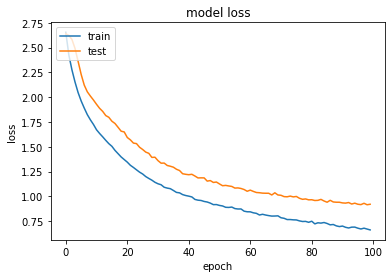

In [31]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()